In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.shape, train.columns
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train['GarageType'].fillna('None', inplace=True)
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

C:\Users\Sarika Agarwal\AppData\Local\Temp\ipykernel_16108\647535435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['GarageType'].fillna('None', inplace=True)


In [4]:
train['MSSubClass'] = train['MSSubClass'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [5]:
qual_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, None: 0}
train['ExterQual'] = train['ExterQual'].map(qual_map)

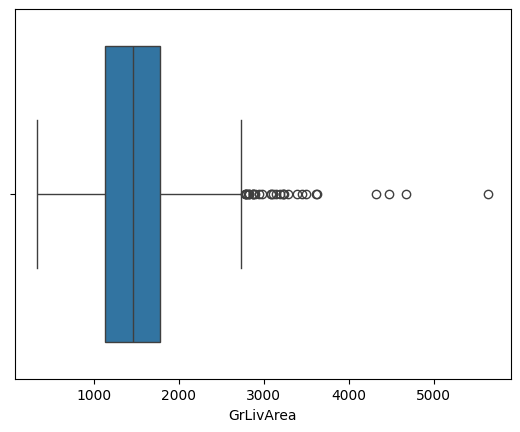

In [6]:
import seaborn as sns
sns.boxplot(x=train['GrLivArea'])

# Remove extreme outliers
train = train[train['GrLivArea'] < 4500]

In [7]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [8]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
train['RemodelAge'] = train['YrSold'] - train['YearRemodAdd']
train['GarageAge'] = train['YrSold'] - train['GarageYrBlt']

In [9]:
train['IsRemodeled'] = (train['YearBuilt'] != train['YearRemodAdd']).astype(int)

In [10]:
train['TotalBath'] = (train['FullBath'] + 0.5 * train['HalfBath'] +
                      train['BsmtFullBath'] + 0.5 * train['BsmtHalfBath'])

In [11]:
train['TotalPorchSF'] = (train['OpenPorchSF'] + train['EnclosedPorch'] + 
                         train['3SsnPorch'] + train['ScreenPorch'])

In [12]:
neigh_counts = train['Neighborhood'].value_counts()
rare_neigh = neigh_counts[neigh_counts < 50].index
train['Neighborhood'] = train['Neighborhood'].apply(lambda x: 'Other' if x in rare_neigh else x)

In [13]:
train['OverallQual_Cond'] = train['OverallQual'] * train['OverallCond']

In [15]:
import numpy as np
train['SalePrice'] = np.log1p(train['SalePrice'])